<a href="https://colab.research.google.com/github/Ankit231299/Sentimental-Analysis-of-restaurant-reviews/blob/main/GAN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
class Generator(nn.Module):
    def __init__(self, latent_dim, img_shape):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, img_shape),
            nn.Tanh()  # Output is in the range [-1, 1]
        )

    def forward(self, z):
        return self.model(z)

In [3]:
class Discriminator(nn.Module):
    def __init__(self, img_shape):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(img_shape, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Output is a probability (0 or 1)
        )

    def forward(self, img):
        return self.model(img)

In [4]:
# Hyperparameters
latent_dim = 100  # Size of the noise vector
img_shape = 28 * 28  # Size of the image (e.g., 28x28 for MNIST)
batch_size = 64
epochs = 200
lr = 0.0002  # Learning rate

In [5]:
# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize images to [-1, 1]
])

# Load dataset
dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 47.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.68MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.1MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.78MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
# Initialize models
generator = Generator(latent_dim, img_shape)
discriminator = Discriminator(img_shape)

# Loss function
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

In [8]:
for epoch in range(10):
    for i, (real_imgs, _) in enumerate(dataloader):
        # Flatten images
        real_imgs = real_imgs.view(-1, img_shape)

        # Labels for real and fake data
        real_labels = torch.ones(real_imgs.size(0), 1)
        fake_labels = torch.zeros(real_imgs.size(0), 1)

        # Train Discriminator
        optimizer_D.zero_grad()

        # Real images
        real_outputs = discriminator(real_imgs)
        d_loss_real = criterion(real_outputs, real_labels)

        # Fake images
        z = torch.randn(real_imgs.size(0), latent_dim)  # Random noise
        fake_imgs = generator(z)
        fake_outputs = discriminator(fake_imgs.detach())
        d_loss_fake = criterion(fake_outputs, fake_labels)

        # Total discriminator loss
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()

        # Generate fake images and calculate loss
        fake_outputs = discriminator(fake_imgs)
        g_loss = criterion(fake_outputs, real_labels)  # Generator tries to fool the discriminator

        # Update generator
        g_loss.backward()
        optimizer_G.step()

        # Print progress
        if i % 100 == 0:
            print(
                f"Epoch [{epoch}/{epochs}] Batch [{i}/{len(dataloader)}] "
                f"D Loss: {d_loss.item():.4f} G Loss: {g_loss.item():.4f}"
            )

Epoch [0/200] Batch [0/938] D Loss: 0.3269 G Loss: 6.3507
Epoch [0/200] Batch [100/938] D Loss: 0.5986 G Loss: 7.7554
Epoch [0/200] Batch [200/938] D Loss: 0.3751 G Loss: 10.1345
Epoch [0/200] Batch [300/938] D Loss: 0.1442 G Loss: 5.7047
Epoch [0/200] Batch [400/938] D Loss: 0.4841 G Loss: 6.7564
Epoch [0/200] Batch [500/938] D Loss: 0.0534 G Loss: 8.0776
Epoch [0/200] Batch [600/938] D Loss: 0.0551 G Loss: 8.7817
Epoch [0/200] Batch [700/938] D Loss: 0.2156 G Loss: 9.1510
Epoch [0/200] Batch [800/938] D Loss: 0.5896 G Loss: 4.7056
Epoch [0/200] Batch [900/938] D Loss: 0.1144 G Loss: 6.0339
Epoch [1/200] Batch [0/938] D Loss: 0.6025 G Loss: 4.7258
Epoch [1/200] Batch [100/938] D Loss: 0.2288 G Loss: 6.3677
Epoch [1/200] Batch [200/938] D Loss: 0.3943 G Loss: 5.1894
Epoch [1/200] Batch [300/938] D Loss: 0.3021 G Loss: 4.3656
Epoch [1/200] Batch [400/938] D Loss: 0.3263 G Loss: 6.4626
Epoch [1/200] Batch [500/938] D Loss: 0.1677 G Loss: 5.6237
Epoch [1/200] Batch [600/938] D Loss: 0.150

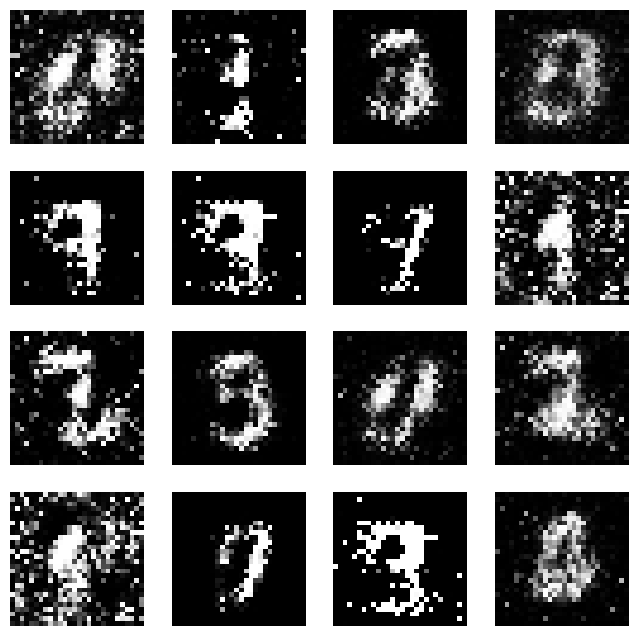

In [9]:
# Generate fake images
z = torch.randn(16, latent_dim)  # 16 random noise vectors
fake_imgs = generator(z).view(-1, 28, 28).detach()

# Plot fake images
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(fake_imgs[i], cmap="gray")
    plt.axis("off")
plt.show()